Number of movies with language 'en' and vote count > 100: 6514


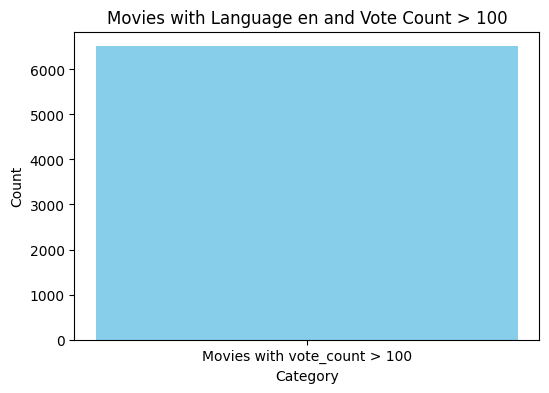

In [13]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Movie Analysis") \
    .getOrCreate()

# Load the dataset
file_path = "C:\\Users\\s566600\\Downloads\\archive (2)\\Top_10000_Movies.csv"
df = spark.read.option("header", "true").csv(file_path, inferSchema=True)

# Filter movies with language 'en' and vote_count > 100
filtered_df = df.filter((df.original_language == 'en') & (df.vote_count > 100))

# Count the number of filtered movies
count = filtered_df.count()

# Print the count of movies
print(f"Number of movies with language 'en' and vote count > 100: {count}")

# Visualization with Matplotlib
# Creating a bar plot to show the count
plt.figure(figsize=(6, 4))
plt.bar(['Movies with vote_count > 100'], [count], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Movies with Language en and Vote Count > 100')
plt.show()

+----+------+-----------------+-----------------+----------+------------+------------+----------+--------------------+--------------------+-------+--------+--------------------+
| _c0|    id|original_language|   original_title|popularity|release_date|vote_average|vote_count|               genre|            overview|revenue| runtime|             tagline|
+----+------+-----------------+-----------------+----------+------------+------------+----------+--------------------+--------------------+-------+--------+--------------------+
|3076|378112|               es|   Dia de Muertos|    21.546|  10/24/2019|         6.9|        99|['Animation', 'Fa...|In the Mexican to...|      0|      95|The origin of the...|
|5139|460316|               es|Hazlo como hombre|    16.424|   8/11/2017|         7.1|        99|          ['Comedy']|"Raúl, Eduardo an...|  until| one day| Santiago confess...|
| 798| 84354|               es|  Joven y alocada|    66.015|   3/29/2012|         6.4|        96| ['Comedy', '

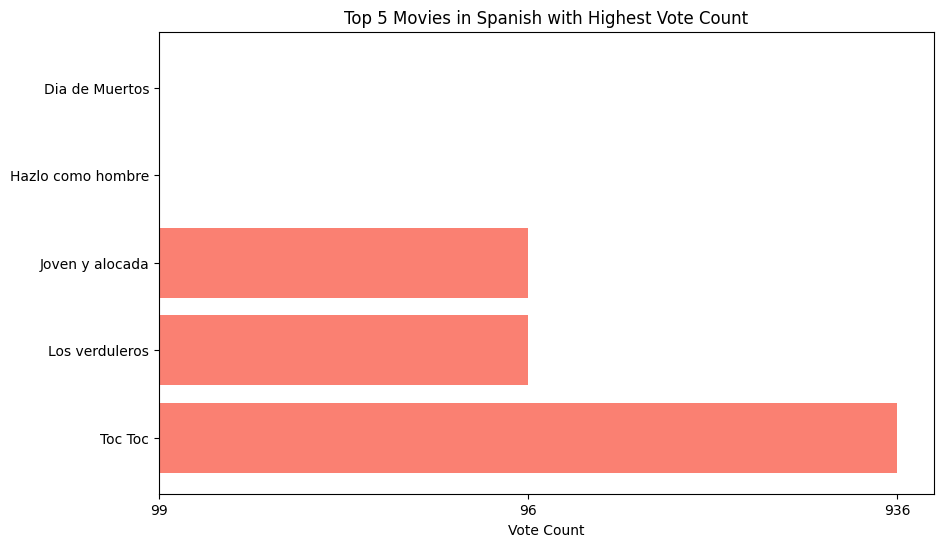

In [14]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Top 5 Movies with Spanish Language and Highest Vote Count") \
    .getOrCreate()

# Load the dataset
file_path = "C:\\Users\\s566600\\Downloads\\archive (2)\\Top_10000_Movies.csv"
df = spark.read.option("header", "true").csv(file_path, inferSchema=True)

# Filter movies with language 'es'
filtered_df_es = df.filter(df.original_language == 'es')

# Sort by vote_count in descending order and get top 5
top_5_movies = filtered_df_es.orderBy(df.vote_count.desc()).limit(5)

# Show top 5 movies
top_5_movies.show()

# Convert to Pandas DataFrame for visualization (if needed)
top_5_movies_pd = top_5_movies.toPandas()

# Visualization with Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_5_movies_pd['original_title'], top_5_movies_pd['vote_count'], color='salmon')
plt.xlabel('Vote Count')
plt.title('Top 5 Movies in Spanish with Highest Vote Count')
plt.gca().invert_yaxis()  # To display the highest vote count on top
plt.show()

+---+------+-----------------+--------------------+----------+------------+------------+----------+--------------------+--------------------+---------+-------+--------------------+
|_c0|    id|original_language|      original_title|popularity|release_date|vote_average|vote_count|               genre|            overview|  revenue|runtime|             tagline|
+---+------+-----------------+--------------------+----------+------------+------------+----------+--------------------+--------------------+---------+-------+--------------------+
|  0|580489|               en|Venom: Let There ...|  5401.308|   9/30/2021|         6.8|      1736|['Science Fiction...|After finding a h...|424000000|     97|                NULL|
|  1|524434|               en|            Eternals|  3365.535|   11/3/2021|         7.1|       622|['Action', 'Adven...|The Eternals are ...|165000000|    157| In the beginning...|
|  2|438631|               en|                Dune|  2911.423|   9/15/2021|           8|      3

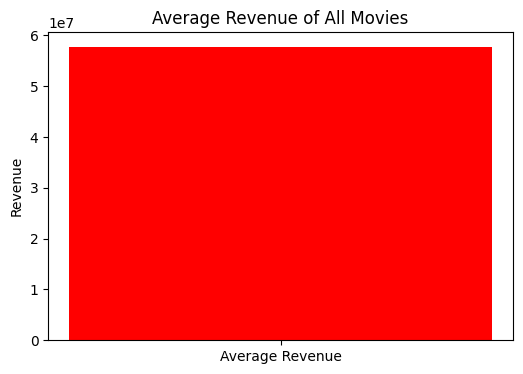

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Movies Analysis") \
    .getOrCreate()

# Load the dataset
file_path = r"C:\Users\s566600\Downloads\archive (2)\Top_10000_Movies.csv"
movies_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows to verify the data
movies_df.show(5)

# Check the schema of the dataset to verify column types
movies_df.printSchema()

# Filter out rows where 'revenue' is null
movies_df_filtered = movies_df.filter(movies_df['revenue'].isNotNull())

# Calculate the average revenue
average_revenue = movies_df_filtered.agg(F.avg('revenue')).collect()[0][0]

# Print the result
print(f"The average revenue of all movies is: {average_revenue}")

# Visualization: Bar chart showing the average revenue
plt.figure(figsize=(6, 4))
plt.bar(['Average Revenue'], [average_revenue], color='red')
plt.title('Average Revenue of All Movies')
plt.ylabel('Revenue')
plt.show()

+---+------+-----------------+--------------------+----------+------------+------------+----------+--------------------+--------------------+---------+-------+--------------------+
|_c0|    id|original_language|      original_title|popularity|release_date|vote_average|vote_count|               genre|            overview|  revenue|runtime|             tagline|
+---+------+-----------------+--------------------+----------+------------+------------+----------+--------------------+--------------------+---------+-------+--------------------+
|  0|580489|               en|Venom: Let There ...|  5401.308|   9/30/2021|         6.8|      1736|['Science Fiction...|After finding a h...|424000000|     97|                NULL|
|  1|524434|               en|            Eternals|  3365.535|   11/3/2021|         7.1|       622|['Action', 'Adven...|The Eternals are ...|165000000|    157| In the beginning...|
|  2|438631|               en|                Dune|  2911.423|   9/15/2021|           8|      3

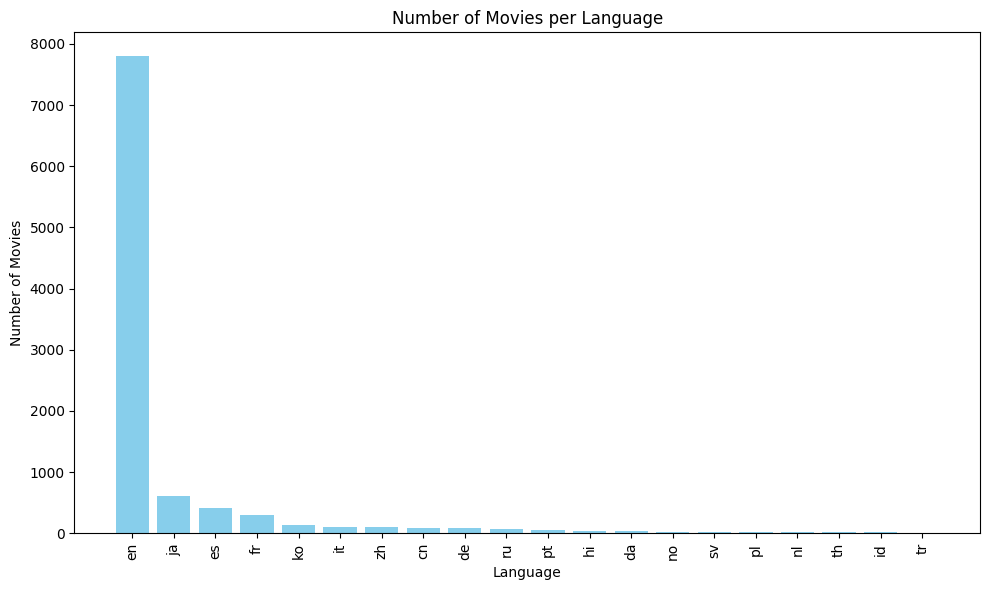

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Movies Analysis") \
    .getOrCreate()

# Load the dataset
file_path = r"C:\Users\s566600\Downloads\archive (2)\Top_10000_Movies.csv"
movies_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows to verify the data
movies_df.show(5)

# Check the schema of the dataset to verify column types
movies_df.printSchema()

# Filter out null values in 'original_language'
movies_df_filtered = movies_df.filter(movies_df['original_language'].isNotNull())

# Get the count of movies per language
language_counts_df = movies_df_filtered.groupBy('original_language').count().orderBy(F.desc('count'))

# Collect the results to use in visualization
language_counts = language_counts_df.collect()

# Prepare data for plotting
languages = [row['original_language'] for row in language_counts]
counts = [row['count'] for row in language_counts]

# Create a bar chart to show the count of movies per language
plt.figure(figsize=(10, 6))
plt.bar(languages[:20], counts[:20], color='skyblue')  # Show top 20 languages
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Language')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

+---+------+-----------------+--------------------+----------+------------+------------+----------+--------------------+--------------------+---------+-------+--------------------+
|_c0|    id|original_language|      original_title|popularity|release_date|vote_average|vote_count|               genre|            overview|  revenue|runtime|             tagline|
+---+------+-----------------+--------------------+----------+------------+------------+----------+--------------------+--------------------+---------+-------+--------------------+
|  0|580489|               en|Venom: Let There ...|  5401.308|   9/30/2021|         6.8|      1736|['Science Fiction...|After finding a h...|424000000|     97|                NULL|
|  1|524434|               en|            Eternals|  3365.535|   11/3/2021|         7.1|       622|['Action', 'Adven...|The Eternals are ...|165000000|    157| In the beginning...|
|  2|438631|               en|                Dune|  2911.423|   9/15/2021|           8|      3

C:\Users\s566600\AppData\Local\Temp\ipykernel_17748\3101420528.py:33: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\s566600\AppData\Local\Temp\ipykernel_17748\3101420528.py:33: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\s566600\AppData\Local\Temp\ipykernel_17748\3101420528.py:33: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\s566600\AppData\Local\Temp\ipykernel_17748\3101420528.py:33: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\s566600\AppData\Local\Temp\ipykernel_17748\3101420528.py:33: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\s566600\AppData\Local\Temp\ipykernel_17748\3101420528.py:33: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED

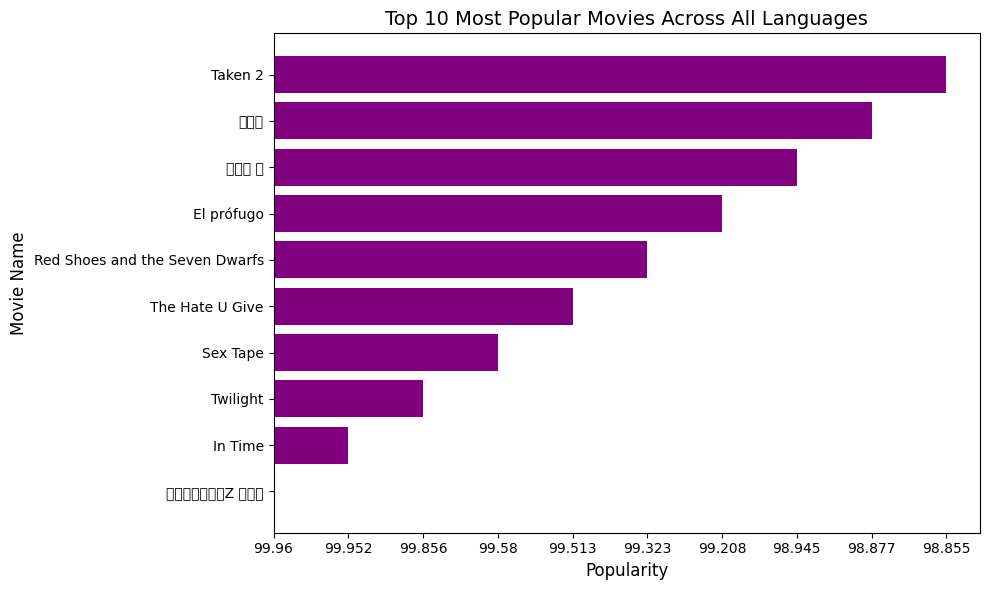

In [33]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Movies Analysis") \
    .getOrCreate()

# Load the dataset
file_path = r"C:\Users\s566600\Downloads\archive (2)\Top_10000_Movies.csv"
movies_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows to verify the data
movies_df.show(5)

# Check the schema of the dataset to verify column types
movies_df.printSchema()

# Sort movies by popularity in descending order and select top 10
top_10_popular_movies = movies_df.orderBy(F.desc('popularity')).limit(10)

# Collect data for visualization
movie_names = [row['original_title'] for row in top_10_popular_movies.collect()]
popularity_values = [row['popularity'] for row in top_10_popular_movies.collect()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(movie_names, popularity_values, color='purple')
plt.title('Top 10 Most Popular Movies Across All Languages', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Movie Name', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

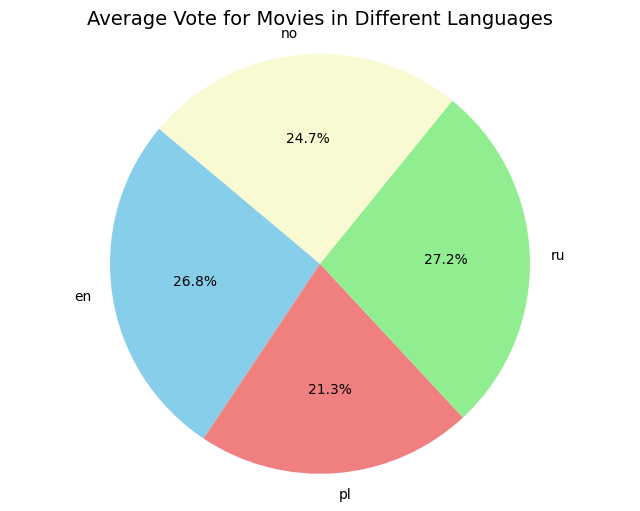

In [34]:
# Import necessary libraries
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Filter movies in the specified languages
languages = ['en', 'no', 'ru', 'pl']
movies_filtered_df = movies_df.filter(movies_df['original_language'].isin(languages))

# Calculate the average vote for each language
avg_vote_df = movies_filtered_df.groupBy('original_language').agg(F.avg('vote_average').alias('avg_vote'))

# Collect the results
avg_vote_data = avg_vote_df.collect()

# Prepare data for the pie chart
labels = [row['original_language'] for row in avg_vote_data]
sizes = [row['avg_vote'] for row in avg_vote_data]

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgoldenrodyellow'])
plt.title('Average Vote for Movies in Different Languages', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
